# Comparison of different word representation method on sentiment analysis example

### Project purpose

#### The project purpose is testing three, different approaches to representation of words:
   #### a) the usage of Embedding layer
   #### b) the usage of Word2vec layer which will be trained on our data
   #### c) the usage of Word2vec layer which was trained by Google on large amount of data

#### Project dataset contains only thousand product reviews and classification whether review is positive or negative. For modeling stuff, LSTM and SimpleRNA models were used.

Libraries

In [ ]:
from nltk.corpus import stopwords
import nltk
import string
import re
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import pandas as pd
from pandas import read_excel
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import keras 
from keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from gensim.models import Word2Vec
from string import punctuation
from numpy import array

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Import data from excel file

In [ ]:
df = read_excel("/home/kodolamacz/Pulpit/NLP/NLP.xlsx")
df.head()

,Text,Score
0,So there is no way for me to plug it in here i...,0
1,Good case. Excellent value.,1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Dataset contains two columns. "Text" column contains product reviews. "Score" column contains classification.

# Data explaration 

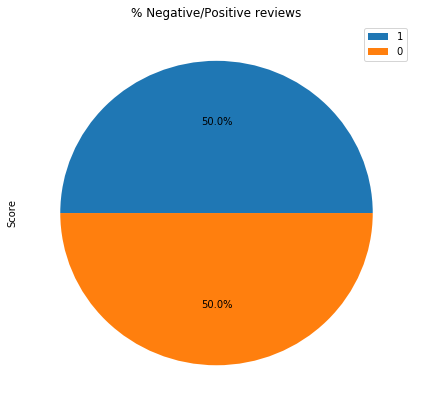

In [ ]:
import matplotlib.pyplot as plt
df['Score'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(7, 7),labels=None, legend=True)
plt.title('% Negative/Positive reviews')
plt.show()

The dataset is balanced, contains 50% positive and negative reviews

In [ ]:
df.count()

Text     1000
Score    1000
dtype: int64

The dataset has 1000 observations without missing values.

In [ ]:
positive = df.loc[df['Score']==1]
negative = df.loc[df['Score']==0]

### Word cloud for positive reviews

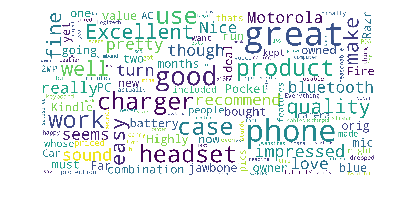

In [ ]:
wordcloud_pos = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,  
                          scale=10,
                          random_state=1
                         ).generate(str(positive['Text']))

plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

### Word cloud for negative reviews

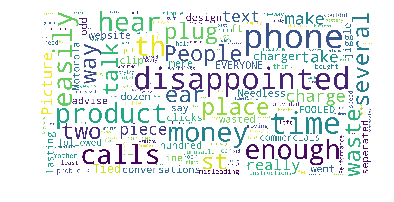

In [ ]:
wordcloud_neg = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,  
                          scale=10,
                          random_state=1
                         ).generate(str(negative['Text']))

plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

# Data preparation

In [ ]:
tokenizer = Tokenizer(split=' ') 
tokenizer.fit_on_texts(df['Text'])
X = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(X) 
Y = np.array(df['Score']).reshape((X.shape[0],1)) 
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.9) 
vocab_size = len(tokenizer.word_index)+1 

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Model building

## 1. LSTM with embedding layer

In [ ]:
rows = []

In [ ]:
def LSTM_emb(emb,neurons):
    model = Sequential()
    model.add(Embedding(vocab_size,emb,input_length=X.shape[1]))
    model.add(Bidirectional(LSTM(neurons)))
    model.add(Dense(1,activation="sigmoid")) # to jest nasz klasyfikator 

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

    history = model.fit(x_train,y_train, epochs=10, verbose=False, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
    a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
    c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]
    row = [a,c,b,d] 
    rows.append(row) 

Test LSTM models with different number of neurons and embeddings.

In [ ]:
emb=[50,100,150,200,250,300]
neurons =[10,20,50]
for i in emb:
    for n in neurons:
     LSTM_emb(i,n)

In [ ]:
def LSTM_emb_df(r)
    quality = pd.DataFrame(rows)
    quality.columns = ['Loss Test', 'Loss Train','Accuracy Test','Accuracy Train']
    quality['Model'] = ['LSTM(10)_emb_50','LSTM(10)_emb_100','LSTM(10)_emb_150','LSTM(10)_emb_200', 'LSTM(10)_emb_250','LSTM(10)_emb_300',
                    'LSTM(20)_emb_50','LSTM(20)_emb_100','LSTM(20)_emb_150','LSTM(20)_emb_200', 'LSTM(20)_emb_250','LSTM(20)_emb_300',
                    'LSTM(50)_emb_50','LSTM(50)_emb_100','LSTM(50)_emb_150','LSTM(50)_emb_200', 'LSTM(50)_emb_250','LSTM(50)_emb_300'
                   ]
    quality = quality.sort_values(by=['Accuracy Test'], ascending=False)


,Loss Test,Loss Train,Accuracy Test,Accuracy Train,Model
17,0.464585,0.177318,0.77,0.946667,LSTM(50)_emb_300
12,0.512932,0.340830,0.75,0.932222,LSTM(50)_emb_50
1,0.584442,0.480902,0.74,0.901111,LSTM(10)_emb_100
4,0.539261,0.363093,0.74,0.911111,LSTM(10)_emb_250
14,0.461675,0.203461,0.74,0.935556,LSTM(50)_emb_150
8,0.587490,0.223604,0.74,0.934444,LSTM(20)_emb_150
15,0.556865,0.421177,0.73,0.923333,LSTM(50)_emb_200
3,0.569678,0.469964,0.73,0.916667,LSTM(10)_emb_200
5,0.576674,0.259655,0.73,0.930000,LSTM(10)_emb_300
0,0.595899,0.500879,0.72,0.893333,LSTM(10)_emb_50


In [ ]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
def highlight_min(data, color='yellow'):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
color_table = quality.style.\
    apply(highlight_max, color = 'lightgreen', subset=['Accuracy Test']).\
    apply(highlight_min, color = 'yellow', subset=['Loss Test'])

In [ ]:
color_table

,Loss Test,Loss Train,Accuracy Test,Accuracy Train,Model
17,0.464585,0.177318,0.77,0.946667,LSTM(50)_emb_300
12,0.512932,0.34083,0.75,0.932222,LSTM(50)_emb_50
1,0.584442,0.480902,0.74,0.901111,LSTM(10)_emb_100
4,0.539261,0.363093,0.74,0.911111,LSTM(10)_emb_250
14,0.461675,0.203461,0.74,0.935556,LSTM(50)_emb_150
8,0.58749,0.223604,0.74,0.934444,LSTM(20)_emb_150
15,0.556865,0.421177,0.73,0.923333,LSTM(50)_emb_200
3,0.569678,0.469964,0.73,0.916667,LSTM(10)_emb_200
5,0.576674,0.259655,0.73,0.93,LSTM(10)_emb_300
0,0.595899,0.500879,0.72,0.893333,LSTM(10)_emb_50


LSTM with 50 neurons has the highest accuracy on test set but more than 10 percentage points of difference with train set, which means that our models can be overfitted. 

## 2. RNN with embedding layer

We also try to repeat previous steps with RNN model. 

In [ ]:
rows1 = []

In [ ]:
def RNN_emb(embb,neuron):
    model = Sequential()
    model.add(Embedding(vocab_size,embb,input_length=X.shape[1]))
    model.add(SimpleRNN(neuron))
    model.add(Dense(1,activation="sigmoid")) 

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

    history = model.fit(x_train,y_train, epochs=10, verbose=False, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
    a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
    c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]
    row = [a,c,b,d] 
    rows1.append(row) 

In [ ]:
embb=[50,100,150,200,250,300]
neuron =[10,20,50]
for i in embb:
    for n in neuron:
     RNN_emb(i,n)

In [ ]:
quality1 = pd.DataFrame(rows1)
quality1.columns = ['Loss Test', 'Loss Train','Accuracy Test','Accuracy Train']
quality1['Model'] = ['RNN(10)_emb_50','RNN(10)_emb_100','RNN(10)_emb_150','RNN(10)_emb_200', 'RNN(10)_emb_250','RNN(10)_emb_300',
                    'RNN(20)_emb_50','RNN(20)_emb_100','RNN(20)_emb_150','RNN(20)_emb_200', 'RNN(20)_emb_250','RNN(20)_emb_300',
                    'RNN(50)_emb_50','RNN(50)_emb_100','RNN(50)_emb_150','RNN(50)_emb_200', 'RNN(50)_emb_250','RNN(50)_emb_300'
                   ]
quality1 = quality1.sort_values(by=['Accuracy Test'], ascending=False)
quality1

,Loss Test,Loss Train,Accuracy Test,Accuracy Train,Model
1,0.502097,0.325509,0.81,0.935556,RNN(10)_emb_100
0,0.539707,0.359847,0.80,0.922222,RNN(10)_emb_50
13,0.491428,0.213315,0.75,0.948889,RNN(50)_emb_100
16,0.483241,0.194044,0.74,0.954444,RNN(50)_emb_250
5,0.623693,0.232457,0.73,0.922222,RNN(10)_emb_300
8,0.583940,0.236119,0.72,0.917778,RNN(20)_emb_150
14,0.667163,0.227659,0.70,0.907778,RNN(50)_emb_150
17,0.675381,0.199901,0.69,0.918889,RNN(50)_emb_300
7,0.584407,0.262607,0.66,0.906667,RNN(20)_emb_100
4,0.632145,0.287275,0.66,0.903333,RNN(10)_emb_250


In [ ]:
color_table1 = quality1.style.\
    apply(highlight_max, color = 'lightgreen', subset=['Accuracy Test']).\
    apply(highlight_min, color = 'yellow', subset=['Loss Test'])

In [ ]:
color_table1

,Loss Test,Loss Train,Accuracy Test,Accuracy Train,Model
1,0.502097,0.325509,0.81,0.935556,RNN(10)_emb_100
0,0.539707,0.359847,0.8,0.922222,RNN(10)_emb_50
13,0.491428,0.213315,0.75,0.948889,RNN(50)_emb_100
16,0.483241,0.194044,0.74,0.954444,RNN(50)_emb_250
5,0.623693,0.232457,0.73,0.922222,RNN(10)_emb_300
8,0.58394,0.236119,0.72,0.917778,RNN(20)_emb_150
14,0.667163,0.227659,0.7,0.907778,RNN(50)_emb_150
17,0.675381,0.199901,0.69,0.918889,RNN(50)_emb_300
7,0.584407,0.262607,0.66,0.906667,RNN(20)_emb_100
4,0.632145,0.287275,0.66,0.903333,RNN(10)_emb_250


RNN with 10 neurons has the highest accuracy on test set but more than 10 percentage points of difference with train set, which means that our models can be overfitted. 

## 3. LSTM with own Word2vec

Word2vec processes documents sentence by sentence so data should be prepared differently than in previous example. 

In [ ]:
text = df["Text"]
last_row = df.shape[0]-1

In [ ]:
clean = []
for i in range(0,last_row):
    tokens = text[i].split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    clean.append(tokens)

In [ ]:
def load_embedding(filename):
    file = open(filename,'r')
    lines = file.readlines()
    file.close()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding
 
def get_weight_matrix(embedding, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 200))
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
    return weight_matrix

### a) CBOW

In [ ]:
model = Word2Vec(clean, size=200, window=5, workers=3, min_count=1, sg=1)
filename = 'embedding_word2vec_cbow.txt'
model.wv.save_word2vec_format(filename, binary=False)
raw_embedding = load_embedding('embedding_word2vec_cbow.txt')
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
#embedding_layer = Embedding(vocab_size, 200, weights=[embedding_vectors], input_length=X.shape[1], trainable=False)

#### Model LSTM

In [ ]:
rows2 = []

In [ ]:
def LSTM(neurons):
    model = Sequential()
    model.add(Embedding(vocab_size, 200, weights=[embedding_vectors], input_length=X.shape[1], trainable=False))
    model.add(Bidirectional(LSTM(neurons)))
    model.add(Dense(1,activation="sigmoid")) # to jest nasz klasyfikator 

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

    history = model.fit(x_train,y_train, epochs=10, verbose=False, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
    a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
    c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]
    row = [a,c,b,d] 
    rows2.append(row) 

In [ ]:
LSTM(10)

In [ ]:
quality2 = pd.DataFrame(rows)
quality2.columns = ['Loss Test', 'Loss Train','Accuracy Test','Accuracy Train']
quality2['Model'] = ['LSTM(10)_cbow','LSTM(20)_cbow','LSTM(30)_cbow']
quality2 = quality2.sort_values(by=['Accuracy Test'], ascending=False)

In [ ]:
color_table1 = quality2.style.\
    apply(highlight_max, color = 'lightgreen', subset=['Accuracy Test']).\
    apply(highlight_min, color = 'yellow', subset=['Loss Test'])

Using CBOW, overfitting problem doesn't occur but the accuracy is significantly lower than in previous model.

#### Model RNN

In [ ]:
rows3 = []

In [ ]:
def RNN(neuron):
    model = Sequential()
    model.add(embedding_layer)
    model.add(SimpleRNN(neuron))
    model.add(Dense(1,activation="sigmoid")) 

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

    history = model.fit(x_train,y_train, epochs=10, verbose=False, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
    a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
    c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]
    row = [a,c,b,d] 
    rows3.append(row) 

In [ ]:
neurons =[10,20,50]
for n in neurons:
 RNN(n)

In [ ]:
color_table3 = quality3.style.\
    apply(highlight_max, color = 'lightgreen', subset=['Accuracy Test']).\
    apply(highlight_min, color = 'yellow', subset=['Loss Test'])

### b) Skip grams

In [ ]:
model = Word2Vec(clean, size=200, window=5, workers=3, min_count=1,sg=0)
filename = 'embedding_word2vec_skipgrams.txt'
model.wv.save_word2vec_format(filename, binary=False)
raw_embedding = load_embedding('embedding_word2vec_skipgrams.txt')
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_vectors], input_length=X.shape[1], trainable=False)

#### Model LSTM

In [ ]:
rows4 = []

Train on 720 samples, validate on 180 samples
Epoch 1/10
720/720 [==============================] - 8s 11ms/step - loss: 0.6944 - acc: 0.4792 - val_loss: 0.6935 - val_acc: 0.4889

In [ ]:
def LSTM(neurons):
    model = Sequential()
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(neurons)))
    model.add(Dense(1,activation="sigmoid")) # to jest nasz klasyfikator 

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

    history = model.fit(x_train,y_train, epochs=10, verbose=False, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
    a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
    c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]
    row = [a,c,b,d] 
    rows4.append(row) 

In [ ]:
neurons =[10,20,50]
for n in neurons:
 LSTM(n)

,Accuracy Test,Accuracy Train,Loss Test,Loss Train
0,0.46,0.512222,0.693724,0.692831


In [ ]:
quality4 = pd.DataFrame(rows4)
quality4.columns = ['Loss Test', 'Loss Train','Accuracy Test','Accuracy Train']
quality4['Model'] = ['LSTM(10)_cbow','LSTM(20)_cbow','LSTM(30)_cbow']
quality4 = quality4.sort_values(by=['Accuracy Test'], ascending=False)

Using skip-grams model gives worse results than CBOS because not only there is low accuracy but also overfitting problem. 

## LSTM with Word2vec (pre-traind data)

Last approach is the usage of pre-trained word vectors prepared on very large corpora of text data. In our case, Stanford pre-trained word vectors were used. 

In [ ]:
raw_embedding = load_embedding('glove.6B.200d.txt')
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_vectors], input_length=X.shape[1], trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(20)))
model.add(Dense(1,activation="sigmoid")) 

model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
early_stopping = EarlyStopping(patience=2,monitor="val_acc", min_delta=1)

history = model.fit(x_train,y_train, epochs=10, verbose=True, validation_split=0.2, 
              batch_size = 24, 
              callbacks=[early_stopping])
a,b = model.evaluate(x_test,y_test, verbose=False)[0], model.evaluate(x_test,y_test, verbose=False)[1]
c,d = model.evaluate(x_train,y_train, verbose=False)[0], model.evaluate(x_train,y_train, verbose=False)[1]

Train on 720 samples, validate on 180 samples
Epoch 1/10
720/720 [==============================] - 20s 28ms/step - loss: 0.6722 - acc: 0.5806 - val_loss: 0.6589 - val_acc: 0.6278

In [ ]:
results3 = {'Loss Test':[a],'Loss Train':[c],'Accuracy Test':[b],'Accuracy Train':[d]}

quality_t = pd.DataFrame.from_dict(results3)
quality_t

,Accuracy Test,Accuracy Train,Loss Test,Loss Train
0,0.74,0.835556,0.56486,0.423737


The last model has a quite satisfaction accuracy but it has overfitting problem.